In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_straw=pd.read_csv('/Users/jhasneha/Documents/fall2021/DOE/MercerHall_WheatStraw.csv',sep=",",header=None)
df_grain=pd.read_csv('/Users/jhasneha/Documents/fall2021/DOE/MercerHall_WheatGrain.csv',sep=",",header=None)

In [2]:
grain=np.array(df_grain).flatten()
straw=np.array(df_straw).flatten()

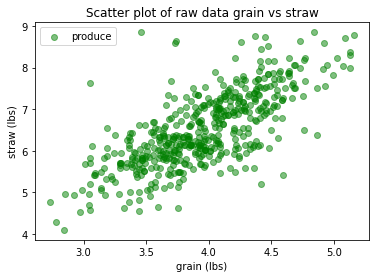

In [3]:
plt.scatter(grain, straw, color="green", alpha=0.5, label="produce")
plt.xlabel("grain (lbs)")
plt.ylabel("straw (lbs)")

plt.legend(loc='upper left')
plt.title("Scatter plot of raw data grain vs straw")
plt.show()

In [4]:
df_grain_flat=pd.DataFrame(pd.Series(grain))
df_straw_flat=pd.DataFrame(pd.Series(straw))
df_grain_flat = df_grain_flat.rename(columns={0: 'Grain'})
df_straw_flat = df_straw_flat.rename(columns={0: 'Straw'})

In [5]:
df_grain_stat=df_grain_flat.join(df_straw_flat, lsuffix='_g', rsuffix='_s')

In [6]:
df_grain_stat["group_g"]=(np.trunc(df_grain_stat["Grain"]*10))/10
#df_grain_stat["group_s"]=(np.trunc(df_grain_stat["Straw"]*10))/10

dict_df=df_grain_stat.groupby(["group_g"]).mean().round(2).reset_index()
dict_gg=dict(zip(dict_df.group_g,dict_df.Grain))
df_grain_stat['Mean_g']=df_grain_stat['group_g'].map(dict_gg)
dict_sg=dict(zip(dict_df.group_g,dict_df.Straw))
df_grain_stat['Mean_s']=df_grain_stat['group_g'].map(dict_sg)

In [7]:
df_grain_stat=df_grain_stat.drop_duplicates(subset=["Mean_g"])
df_grain_stat=df_grain_stat.sort_values(by='Mean_g',ascending=True)

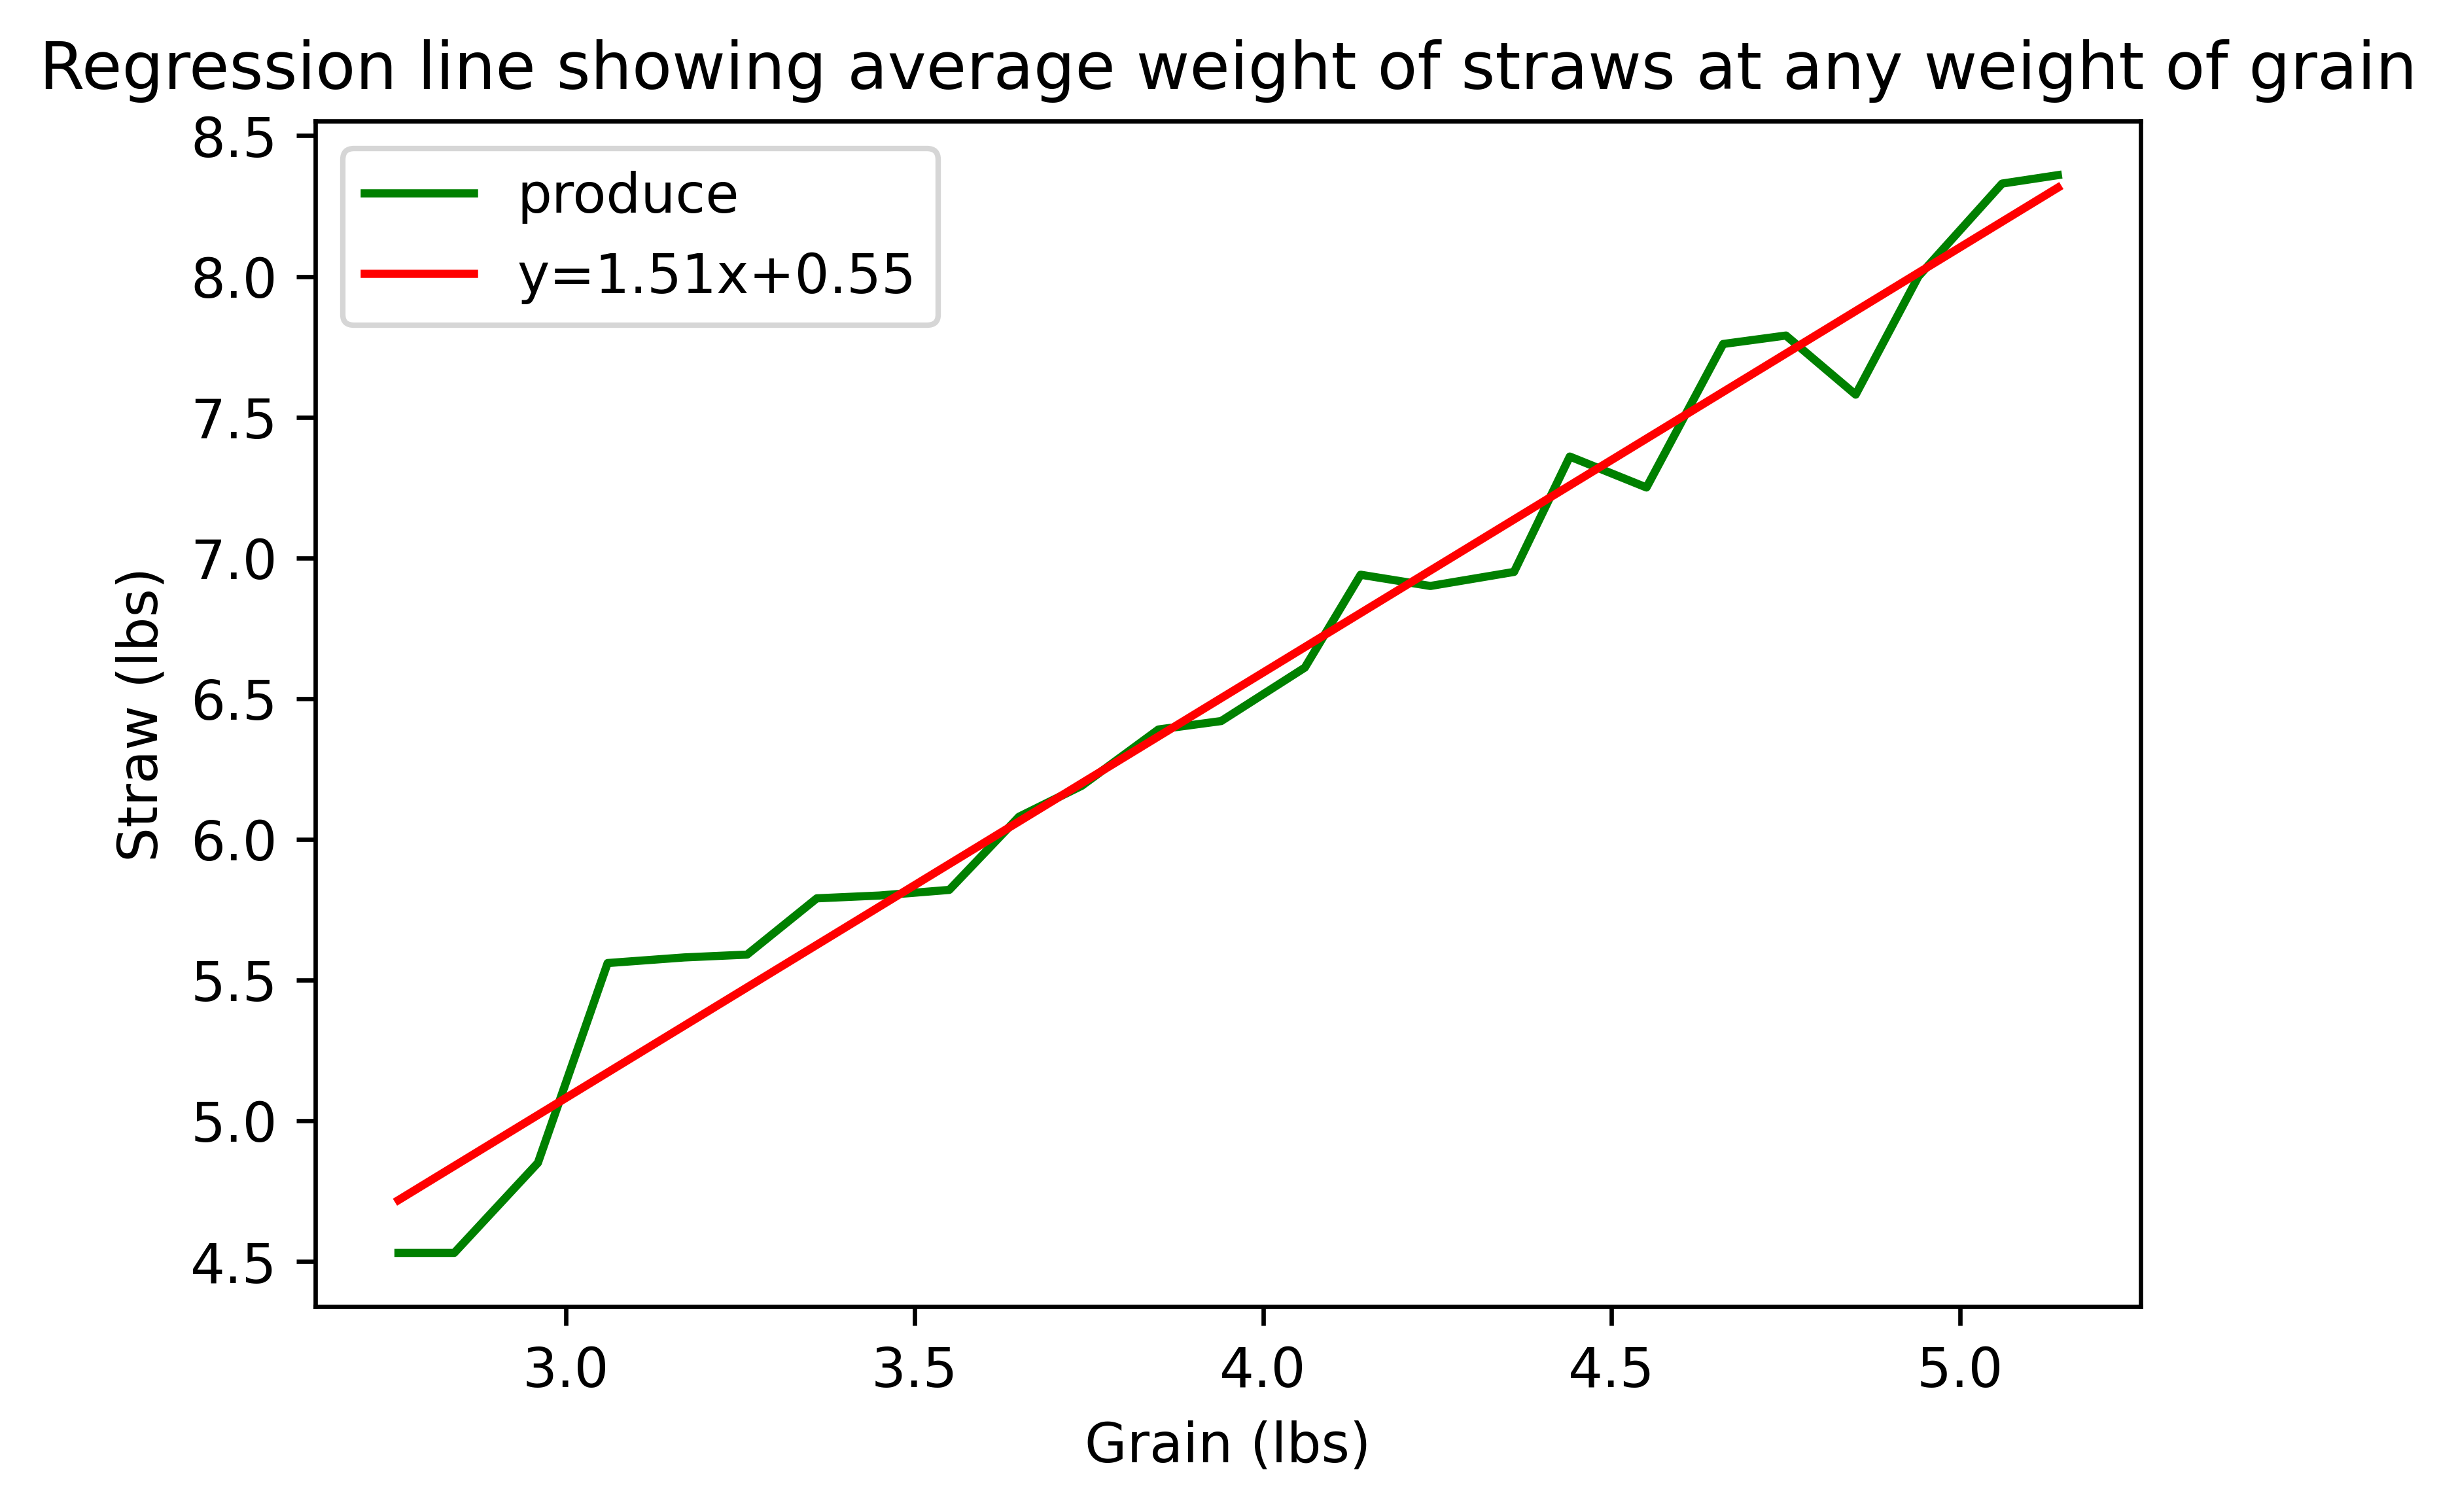

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
from matplotlib import pyplot
from scipy import stats

x=df_grain_stat["Mean_g"]
y=df_grain_stat["Mean_s"]
ax=plt.subplot()
plt.plot(x,y , color="green", alpha=1, label="produce")
plt.xlabel("Grain (lbs)")
plt.ylabel("Straw (lbs)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.plot(x, line, 'red', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Regression line showing average weight of straws at any weight of grain")
plt.legend(loc='upper left')


plt.show()